<a href="https://colab.research.google.com/github/Erike-Simon/CESAR-AED/blob/main/modpred_Regressao_Linear_grupo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Grupo 3:**
* *Erike Simon*
* *Anna Carolina de Roldão*
* *Arthur Lira*
* *José Aparecido Silvano*
* *Yaci Mair da Silva Ribeiro*

# Regressão Linear

Base de dados utilizada:
1. Carregamento de dados
2. Análise dos dados
2. Remoção de campo desnecessário (b)
4. Tratamento de dados nulos e/ou faltantes
5. Separação dos dados, holdout
6. Normalização dos dados
7. Treinamento de modelos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
import os
import sys
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

## Obtenha os dados
**Leia o arquivo csv 'BostonHousing.csv' em um DataFrame**

**Descrição dos dados**

O quadro de dados Boston tem 506 linhas e 14 colunas.

Este quadro de dados contém as seguintes colunas:

* crim: índice de criminalidade per capita por município.

* zn: proporção de terreno residencial zoneada para lotes acima de 25.000 pés quadrados.

* indus: proporção de hectares de negócios não varejistas por cidade.

* chas: Variável fictícia Charles River (= 1 se o trecho limita o rio; 0 caso contrário).

* nox: concentração de óxidos de nitrogênio (partes por 10 milhões).

* rm: número médio de cômodos por domicílio.

* idade / age: proporção de unidades ocupadas pelo proprietário construídas antes de 1940.

* dis: média ponderada das distâncias para cinco centros de emprego de Boston.

* rad: índice de acessibilidade às rodovias radiais.

* imposto / tax: valor total do imposto predial por \$10.000.

* ptratio: relação aluno-professor por município.

* **preto / b**: 1000(Bk - 0,63)^2 onde Bk é a proporção de negros por cidade.

* lstat: status inferior da população (porcentagem).

* medv: valor médio de residências ocupadas pelos proprietários em \$1000s. (**coluna target do nosso modelo**)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

Verifique o cabeçalho do DataFrame

In [ ]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Vamos remover a coluna b porque não vamos utilizar essa informação na nossa modelagem.

In [ ]:
df.drop(columns=['b'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [ ]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


## Estatística Descritiva

Dados faltantes

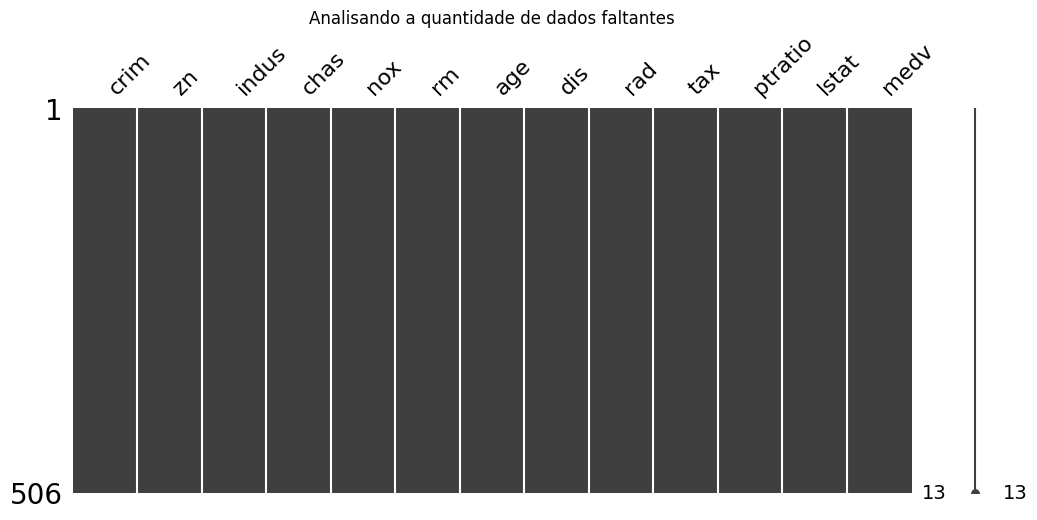

In [ ]:
msno.matrix(df, figsize=(12,5))
plt.title("Analisando a quantidade de dados faltantes")
plt.show()

Distribuição dos dados

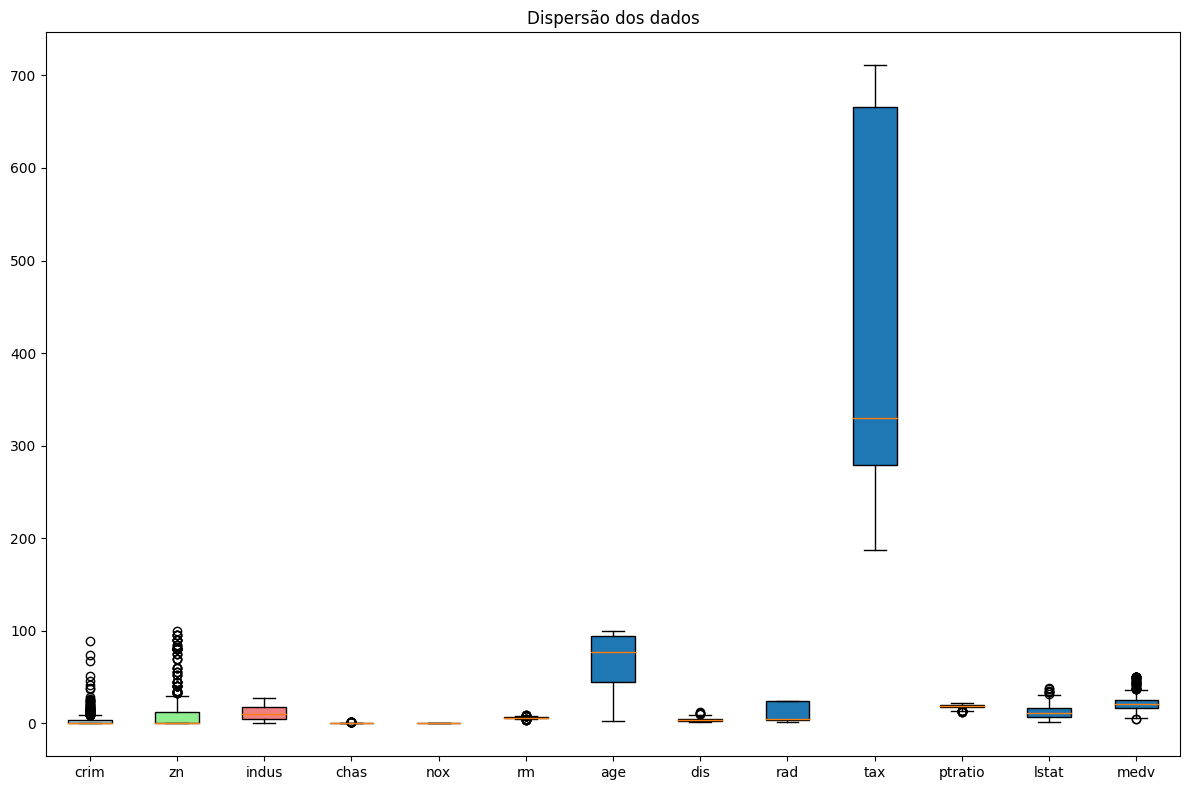

In [ ]:
plt.figure(figsize=(12, 8))  # Tamanho da figura

# Cria o boxplot com paleta de cores padrão do Matplotlib
box = plt.boxplot(df.values, patch_artist=True, labels=df.columns)

# Definir uma cor para os boxes
box_colors = ['lightblue', 'lightgreen', 'lightcoral']

# Preenche os boxes com as cores definidas
for patch, color in zip(box['boxes'], box_colors):
    patch.set_facecolor(color)

plt.title('Dispersão dos dados')
plt.tight_layout() # Ajusta o layout para que os rótulos do eixo x não se sobreponham
plt.show()

<ipython-input-9-c7308bf91e69>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax, grid=False)


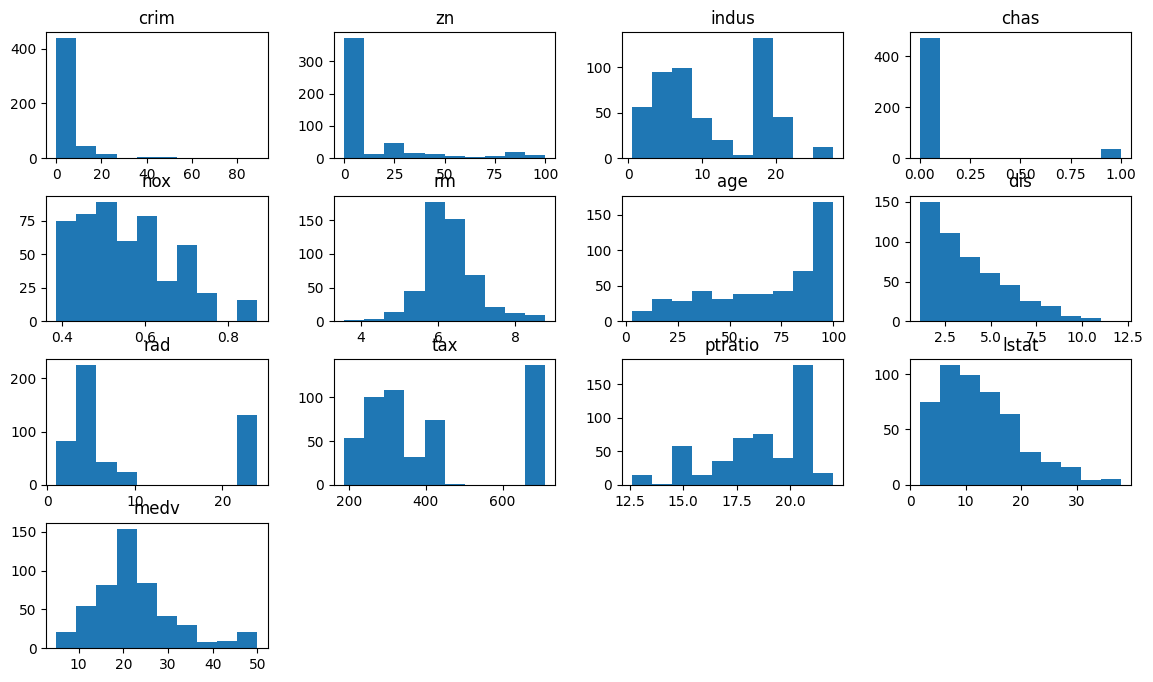

In [ ]:
fig = plt.figure(figsize = (14,8))
ax = fig.gca()
df.hist(ax = ax, grid=False)
plt.title("Dispersão dos dados")
plt.show()

Observa-se que os dados não estão normalmente distribuidos, indicando uma normalização necessária

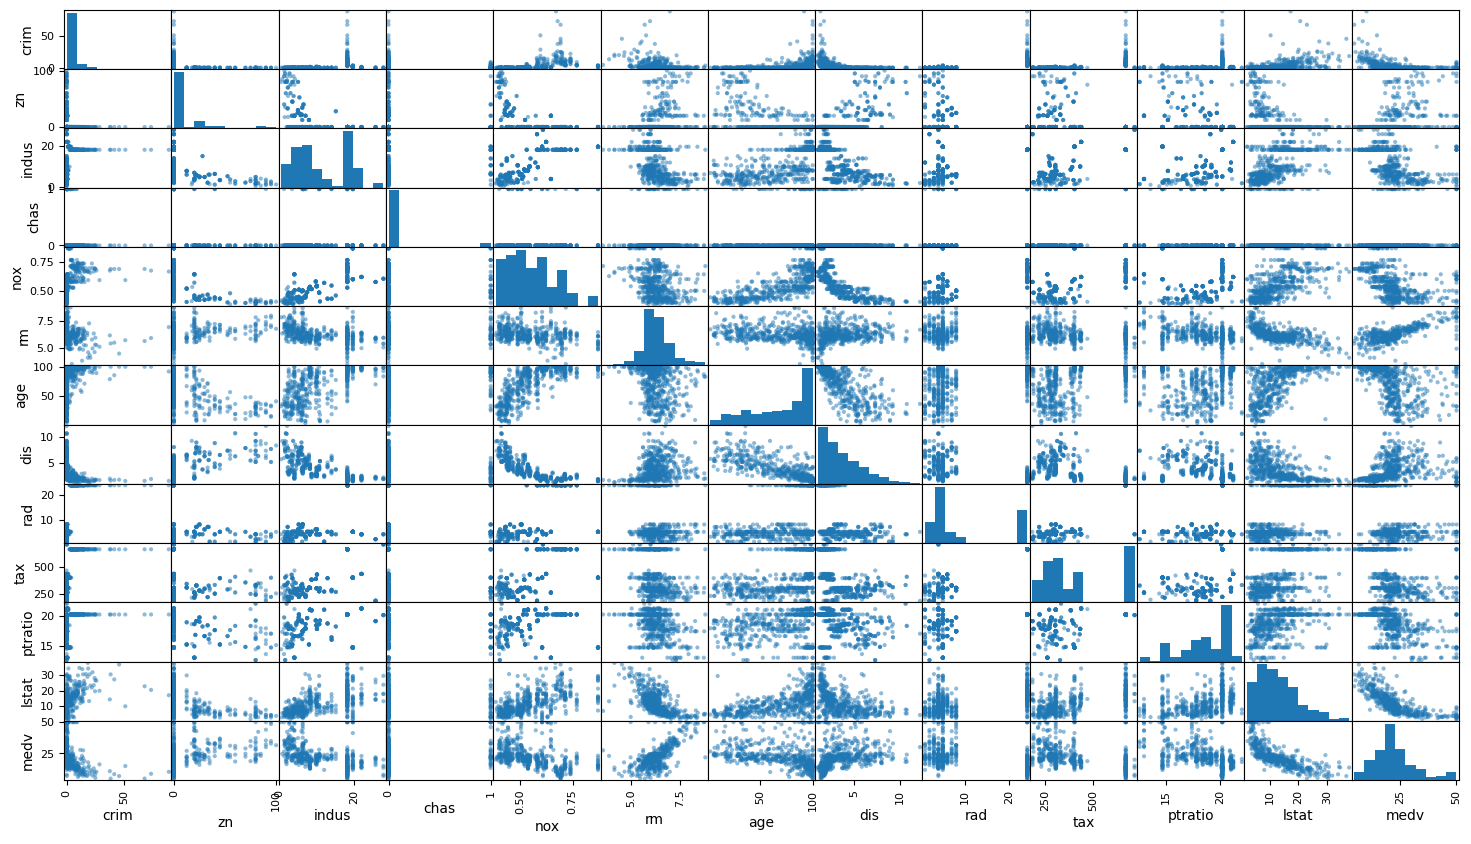

In [ ]:
# Redireciona a saída padrão para o fluxo "devnull"
with open(os.devnull, 'w') as null_stream:
    original_stdout = sys.stdout
    sys.stdout = null_stream

    scatter_matrix(df, figsize=(18, 10))

    # Restaurar a saída padrão
    sys.stdout = original_stdout

## Separação dos dados, holdout

Use o método train_test_split para dividir seus dados em um conjunto treino e teste.

A coluna target do nosso modelo é **medv**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['medv']),
                                                    df['medv'],
                                                    test_size=0.3,
                                                    random_state=111)

In [ ]:
pd.DataFrame(X_train)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
199,0.03150,95.0,1.47,0,0.403,6.975,15.3,7.6534,3,402,17.0,4.56
101,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,7.67
386,24.39380,0.0,18.10,0,0.700,4.652,100.0,1.4672,24,666,20.2,28.28
77,0.08707,0.0,12.83,0,0.437,6.140,45.8,4.0905,5,398,18.7,10.27
176,0.07022,0.0,4.05,0,0.510,6.020,47.2,3.5549,5,296,16.6,10.11
...,...,...,...,...,...,...,...,...,...,...,...,...
86,0.05188,0.0,4.49,0,0.449,6.015,45.1,4.4272,3,247,18.5,12.86
212,0.21719,0.0,10.59,1,0.489,5.807,53.8,3.6526,4,277,18.6,16.03
468,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666,20.2,18.13
364,3.47428,0.0,18.10,1,0.718,8.780,82.9,1.9047,24,666,20.2,5.29


In [ ]:
pd.DataFrame(y_train)

,medv
199,34.9
101,26.5
386,10.5
77,20.8
176,23.2
...,...
86,22.5
212,22.4
468,19.1
364,21.9


## Normalização dos dados

Vamos normalizar os dados.


In [ ]:
# Normalizar todas as features como primeira abordagem
sc = StandardScaler().fit(X_train)

X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

In [ ]:
pd.DataFrame(X_train_scaled[:5])

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.449075,3.783814,-1.433474,-0.281546,-1.338894,1.026007,-1.971418,1.858911,-0.769279,-0.075247,-0.756623,-1.190063
1,-0.437998,-0.461946,-0.402766,-0.281546,-0.312223,0.734625,0.065737,-0.428523,-0.540627,-0.181419,1.109722,-0.740085
2,2.809313,-0.461946,0.984110,-0.281546,1.267271,-2.463070,1.109779,-1.090774,1.631570,1.481942,0.774737,2.241925
3,-0.441642,-0.461946,0.217984,-0.281546,-1.040545,-0.228138,-0.861896,0.160060,-0.540627,-0.098841,0.056912,-0.363897
4,-0.443896,-0.461946,-1.058407,-0.281546,-0.399972,-0.408375,-0.810967,-0.095323,-0.540627,-0.700482,-0.948043,-0.387047


Visualizando os dados de treinamento.

In [ ]:
pd.DataFrame(X_train_scaled).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       354 non-null    float64
 1   1       354 non-null    float64
 2   2       354 non-null    float64
 3   3       354 non-null    float64
 4   4       354 non-null    float64
 5   5       354 non-null    float64
 6   6       354 non-null    float64
 7   7       354 non-null    float64
 8   8       354 non-null    float64
 9   9       354 non-null    float64
 10  10      354 non-null    float64
 11  11      354 non-null    float64
dtypes: float64(12)
memory usage: 33.3 KB


Visualizando os dados de teste.

In [ ]:
pd.DataFrame(X_test_scaled).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       152 non-null    float64
 1   1       152 non-null    float64
 2   2       152 non-null    float64
 3   3       152 non-null    float64
 4   4       152 non-null    float64
 5   5       152 non-null    float64
 6   6       152 non-null    float64
 7   7       152 non-null    float64
 8   8       152 non-null    float64
 9   9       152 non-null    float64
 10  10      152 non-null    float64
 11  11      152 non-null    float64
dtypes: float64(12)
memory usage: 14.4 KB


## Regressão Linear

In [ ]:
reg = LinearRegression() # Cria um modelo
reg.fit(X_train_scaled,y_train) # Treina o modelo com a base de treinamento

LinearRegression()

In [ ]:
# Estima os coeficientes para o problema de regressão linear
reg.coef_

array([-1.04519389,  1.15041223,  0.15639612,  0.39806919, -1.79664937,
        2.28399946, -0.18162112, -2.94370285,  2.05735808, -1.87763605,
       -1.83599605, -3.9793944 ])

In [ ]:
# Termo independente (b)
reg.intercept_

22.253954802259887

**Executar o modelo treinado na base de treinamento**

In [ ]:
y_train_pred = reg.predict(X_train_scaled)
y_test_pred = reg.predict(X_test_scaled)

Analisando o score de treino e teste.

In [ ]:
# Treino
RMSE_train = mean_squared_error(y_train, y_train_pred, squared=False)
R2_train = r2_score(y_train, y_train_pred)

print("R² treino: %0.2f" %(R2_train))

R² treino: 0.74


In [ ]:
# Teste
RMSE_test = mean_squared_error(y_test, y_test_pred, squared=False)
R2_test = r2_score(y_test, y_test_pred)

print("R² teste: %0.2f" %(R2_test))

R² teste: 0.71


**Avaliação de Regressores - Exibir os Resultados**

In [ ]:
# Função para cálculo de métricas
def print_metrics(y_test_in, y_test_pred_in):
  print("MEAN: ", mean_absolute_error(y_test_in, y_test_pred_in))
  print("MAPE: ", mean_absolute_percentage_error(y_test_in, y_test_pred_in))
  print("MSE: ", mean_squared_error(y_test_in, y_test_pred_in))
  print("RMSE: ", mean_squared_error(y_test_in, y_test_pred_in)**2)
  print("R²: ", r2_score(y_test_in, y_test_pred_in))

In [ ]:
# Dados de treino
print_metrics(y_train, y_train_pred)

MEAN:  3.1835585717761252
MAPE:  0.16078737073033178
MSE:  20.374619886830068
RMSE:  415.12513553281127
R²:  0.7381975510401046


In [ ]:
# Dados de teste
print_metrics(y_test, y_test_pred)

MEAN:  3.701488287606292
MAPE:  0.17831885665559696
MSE:  28.607656840343854
RMSE:  818.3980298948725
R²:  0.711547915567693


## KNN Regressão

In [ ]:
regK3 = KNeighborsRegressor(n_neighbors=3)
# Treinar o modelo nos dados de treino
regK3.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=3)

**Executar o modelo treinado na base de treinamento**

O método '*.predict()*' aqui envolve identificar os três vizinhos mais próximos para cada ponto de dados e calcular uma média ponderada das saídas desses vizinhos para fazer a previsão.

In [ ]:
y_train_pred = regK3.predict(X_train_scaled)
y_test_pred = regK3.predict(X_test_scaled)

O método '*.score()*' retorna o coeficiente de determinação *(R²*), que é uma medida da proporção da variabilidade na variável de destino que é explicada pelo modelo.

In [ ]:
R_train_k3 = regK3.score(X_train_scaled, y_train)
R_test_k3 = regK3.score(X_test_scaled, y_test)

print("R² treino para K=3: %0.2f \nR² teste para K=3: %0.2f" %(R_train_k3, R_test_k3))

R² treino para K=3: 0.87 
R² teste para K=3: 0.76


**Avaliar o melhor valor de K**

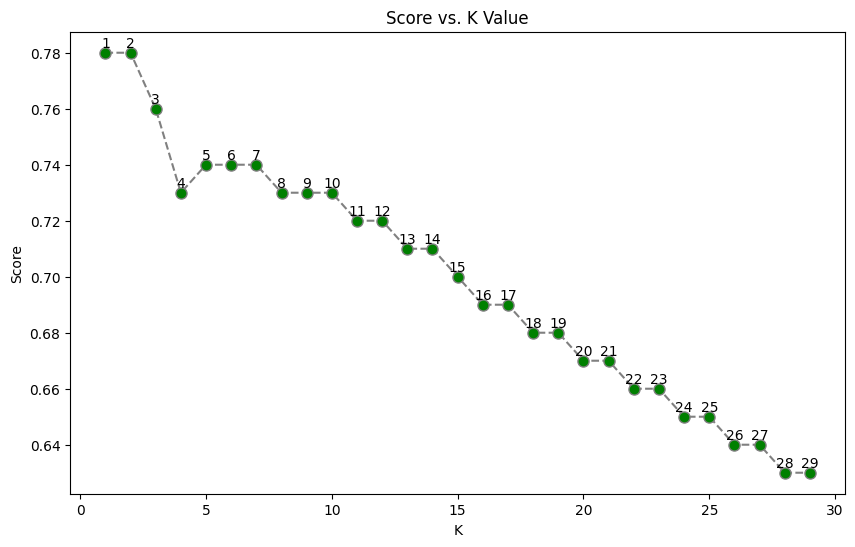

In [ ]:
import numpy as np

score = []

for i in range(1,30):
  # treine o modelo
  reg_knn = KNeighborsRegressor(n_neighbors=i)
  reg_knn.fit(X_train_scaled, y_train)

  ## calcule as métricas
  scores = reg_knn.score(X_test_scaled, y_test)

  # armazene na lista score
  score.append(round(scores,2))

plt.figure(figsize=(10,6))
plt.plot(range(1,30), score, color='grey', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=8)
plt.title('Score vs. K Value')
plt.xlabel('K')
plt.ylabel('Score')

# Adicionar os valores do eixo x acima de cada marcador
for i, err in enumerate(score):
    plt.text(i+1, err + 0.001, str(i+1), ha='center', va='bottom', fontsize=10)

plt.show()

### Criar um regressor com o melhor valor para o melhor K e avaliar





De acordo com o gráfico acima, o melhor *score* do modelo (*R²*, coeficiente de determinação) foi obtivo para *k*=1.

In [ ]:
regK1 = KNeighborsRegressor(n_neighbors=1)
regK1.fit(X_train_scaled, y_train)

y_train_pred_k1 = regK1.predict(X_train_scaled)
y_test_pred_k1 = regK1.predict(X_test_scaled)

In [ ]:
## com o melhor valor de k
R_train_k1 = regK1.score(X_train_scaled, y_train)
R_test_k1 = regK1.score(X_test_scaled, y_test)

print("R² treino para K=2: %0.2f \nR² teste para K=2: %0.2f" %(R_train_k1, R_test_k1))

R² treino para K=2: 1.00 
R² teste para K=2: 0.78


**Avaliação de Regressores - k-NN**

In [ ]:
print("Dados de treino:\n")
print_metrics(y_train, y_train_pred_k1)

Dados de treino:

MEAN:  0.0
MAPE:  0.0
MSE:  0.0
RMSE:  0.0
R²:  1.0


In [ ]:
print("Dados de teste:\n")
print_metrics(y_test, y_test_pred_k1)

Dados de teste:

MEAN:  3.132236842105263
MAPE:  0.15442199439994692
MSE:  21.394802631578948
RMSE:  457.7375796442175
R²:  0.7842753969841532


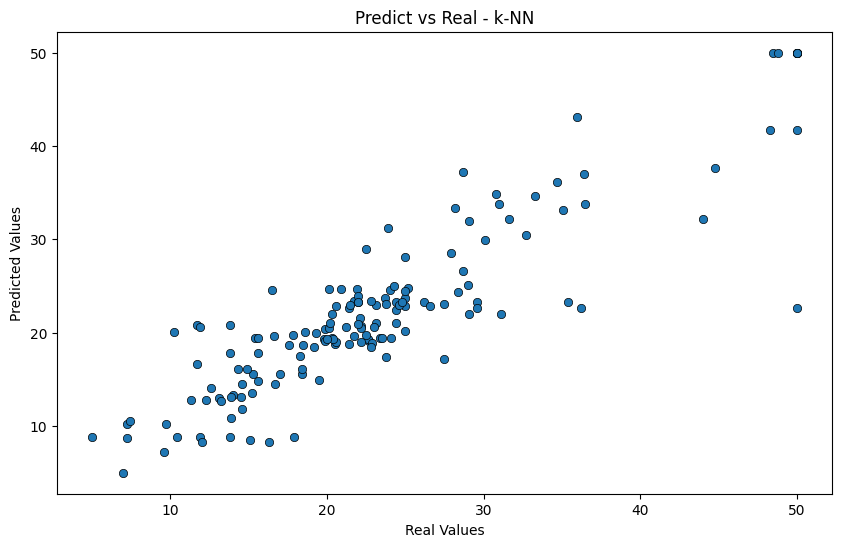

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_test_pred_k1, edgecolors='k', linewidth=0.5)
plt.title('Predict vs Real - k-NN')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')

plt.show()

## Treinar o modelo de Regressão Polinomial, n=1, n=5, n=10

### Com os dados normalizados, aplicar a transformação polinomial de graus 1, 5, 10 e 15

Grau 1

In [ ]:
poly1 = PolynomialFeatures(degree=1) # Cria o gerador de características polinomiais de grau 2
X_train_scaled_poly1 = poly1.fit_transform(X_train_scaled) # Gera as características de grau 2 para X_train
X_test_scaled_poly1 = poly1.transform(X_test_scaled) # Gera as características de grau 2 para X_test

Grau 2

In [ ]:
poly2 = PolynomialFeatures(degree=2)
X_train_scaled_poly2 = poly2.fit_transform(X_train_scaled)
X_test_scaled_poly2 = poly2.transform(X_test_scaled)

Grau 5

In [ ]:
poly5 = PolynomialFeatures(degree=5)
X_train_scaled_poly5 = poly5.fit_transform(X_train_scaled)
X_test_scaled_poly5 = poly5.transform(X_test_scaled)

Grau 10

In [ ]:
poly10 = PolynomialFeatures(degree=10)
X_train_scaled_poly10 = poly10.fit_transform(X_train_scaled)
X_test_scaled_poly10 = poly10.transform(X_test_scaled)

**Treinar o modelo de regressão linear para verificar o melhor resultado da transformação polinomial**

Grau 1

In [ ]:
## treine o modelo
# Cria o regressor linear normalmente, treina e prediz na base de testes
reg1 = LinearRegression(copy_X=True)
reg1.fit(X_train_scaled_poly1, y_train)
y_test_pred_poly1 = reg1.predict(X_test_scaled_poly1)

In [ ]:
print_metrics(y_test, y_test_pred_poly1)

MEAN:  3.7014882876062947
MAPE:  0.17831885665559713
MSE:  28.60765684034387
RMSE:  818.3980298948735
R²:  0.7115479155676928


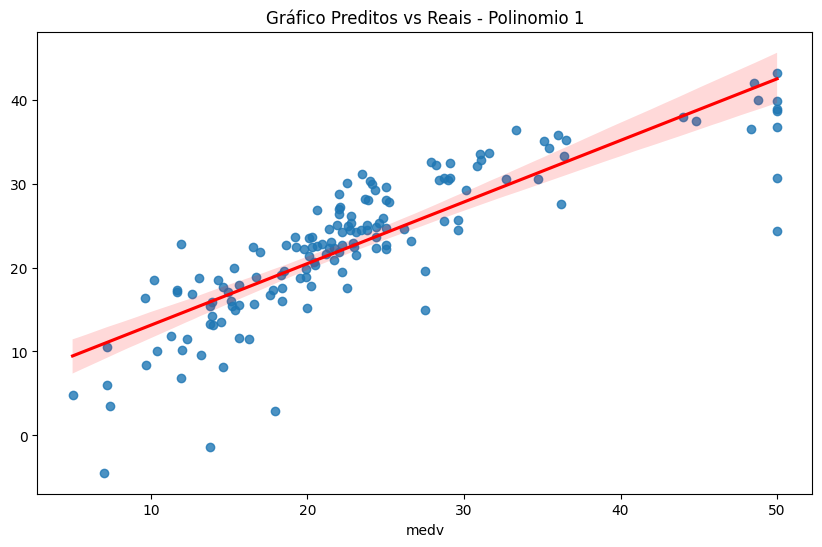

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Gráfico Preditos vs Reais - Polinomio 1')
sns.regplot(x=y_test,y=y_test_pred_poly1,line_kws={"color": "red"})
plt.show()

Grau 2

In [ ]:
## treine o modelo
reg2 = LinearRegression(copy_X=True)
reg2.fit(X_train_scaled_poly2, y_train)
y_test_pred_poly2 = reg2.predict(X_test_scaled_poly2)

In [ ]:
print_metrics(y_test, y_test_pred_poly2)

MEAN:  7.671299342105263
MAPE:  0.3945173499720944
MSE:  112.56646008943258
RMSE:  12671.207937065818
R²:  -0.13501186871663573


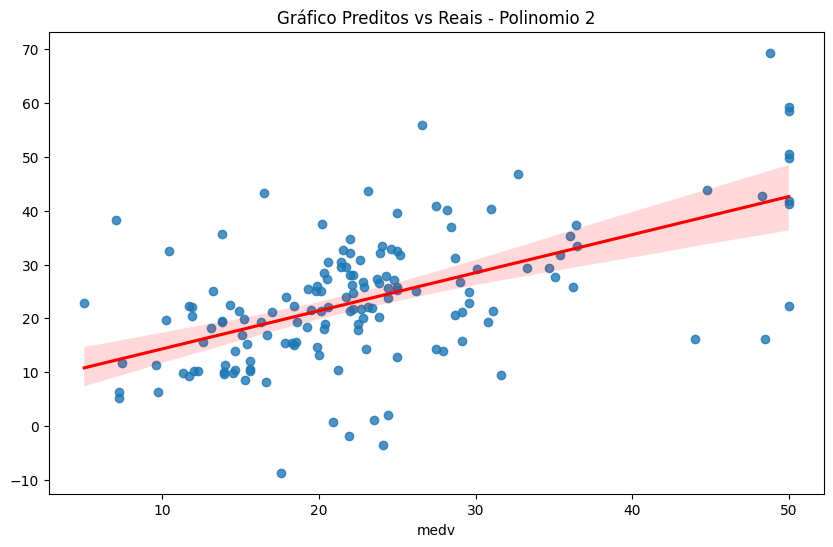

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Gráfico Preditos vs Reais - Polinomio 2')
sns.regplot(x=y_test,y=y_test_pred_poly2,line_kws={"color": "red"})
plt.show()

Grau 5

In [ ]:
# treine o modelo
reg5 = LinearRegression(copy_X=True)
reg5.fit(X_train_scaled_poly5, y_train)
y_test_pred_poly5 = reg5.predict(X_test_scaled_poly5)

In [ ]:
print_metrics(y_test, y_test_pred_poly5)

MEAN:  111.86301225375507
MAPE:  10.490816949025698
MSE:  1107844.024351167
RMSE:  1227318382290.589
R²:  -11169.43314079856


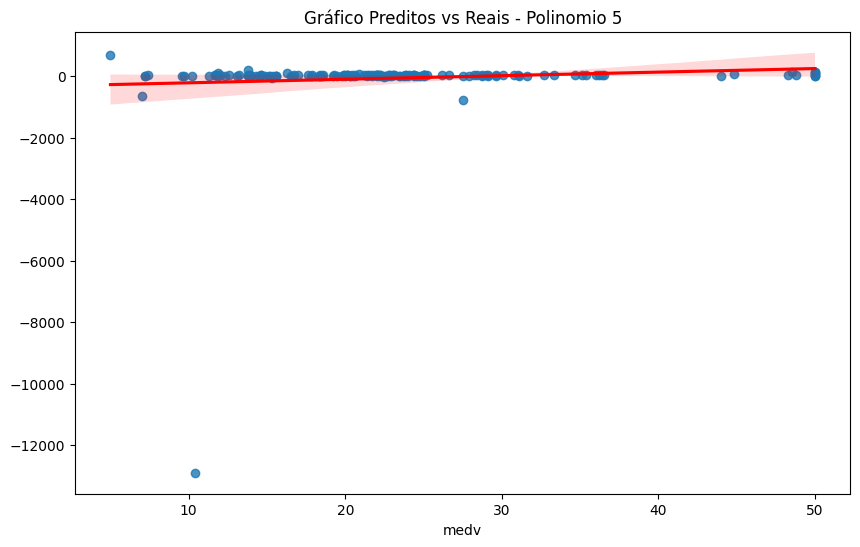

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Gráfico Preditos vs Reais - Polinomio 5')
sns.regplot(x=y_test,y=y_test_pred_poly5,line_kws={"color": "red"})
plt.show()

Grau 10

In [ ]:
# treine o modelo
reg10 = LinearRegression(copy_X=True)
reg10.fit(X_train_scaled_poly10, y_train)
y_test_pred_poly10 = reg10.predict(X_test_scaled_poly10)

In [ ]:
print_metrics(y_test, y_test_pred_poly10)

MEAN:  160858.57193300765
MAPE:  15531.219905051676
MSE:  3841883634039.874
RMSE:  1.4760069857503428e+25
R²:  -38737857788.958305


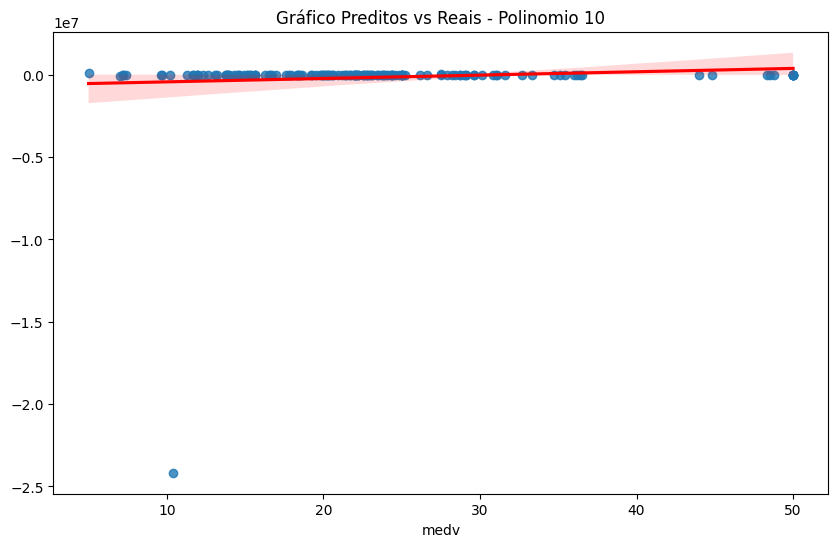

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Gráfico Preditos vs Reais - Polinomio 10')
sns.regplot(x=y_test,y=y_test_pred_poly10,line_kws={"color": "red"})
plt.show()

## Conclusão

Ao empregar o modelo de regressão linear nos dados de treinamento do conjunto de dados *Boston Housing* e ao avaliar as previsões correspondentes aos alvos de treinamento e teste (*y_train_pred* e *y_test_pred*), observamos que os coeficientes de determinação (*R²*) foram de 0.74 e 0.71, respectivamente. Por meio da função *print_metrics()*, realizamos o cálculo das seguintes métricas:

**Dados de treinamento**

* *Média dos Erros Absolutos (MEAN):* 3.18
* *Erro Percentual Médio Absoluto (MAPE):* 16.08%
* *Erro Quadrático Médio (MSE):* 20.37
* *Raiz do Erro Quadrático Médio (RMSE):* 415.13

**Dados de teste**

* *Média dos Erros Absolutos (MEAN):* 3.70
* *Erro Percentual Médio Absoluto (MAPE):* 17.83%
* *Erro Quadrático Médio (MSE):* 28.61
* *Raiz do Erro Quadrático Médio (RMSE):* 818.40

Ao aplicar o modelo *KNeighborsRegressor* nos mesmos conjuntos de treinamento e teste, obtivemos valores de *R²* de 0.87 e 0.76 para *K*=3, demonstrando um desempenho superior em relação ao modelo anterior. O gráfico inicial (*score vs. K value*) indicou que o melhor resultado foi alcançado para *k*=1. Para este valor de *K*, obtivemos um *R²* de 1.00 nos dados de treinamento e um *R²* de 0.78 nos dados de teste. Por meio da função *print_metrics()*, as métricas calculadas foram:

**Dados de treinamento**

* *Média dos Erros Absolutos (MEAN):* 0.0
* *Erro Percentual Médio Absoluto (MAPE):* 0.0%
* *Erro Quadrático Médio (MSE):* 0.0
* *Raiz do Erro Quadrático Médio (RMSE):* 0.0

(*R²*=1.00 indica previsões perfeitas, sem erros)

**Dados de teste**

* *Média dos Erros Absolutos (MEAN):* 3.13
* *Erro Percentual Médio Absoluto (MAPE):* 15.44%
* *Erro Quadrático Médio (MSE):* 21.39
* *Raiz do Erro Quadrático Médio (RMSE):* 457.74

Posteriormente, ao aplicar a regressão polinomial nos dados de teste para polinômios de grau 1, 5 e 10, as métricas resultaram em:

**Grau 1**

* *Média dos Erros Absolutos (MEAN):* 3.70
* *Erro Percentual Médio Absoluto (MAPE):* 17.83%
* *Erro Quadrático Médio (MSE):* 28.61
* *Raiz do Erro Quadrático Médio (RMSE):* 818.40
* *R²:* 0.71

**Grau 2**

* *Média dos Erros Absolutos (MEAN):*  7.67
* *Erro Percentual Médio Absoluto (MAPE):*  0.39%
* *Erro Quadrático Médio (MSE):*  112.57
* *Raiz do Erro Quadrático Médio (RMSE):*  12671.21
* *R²:*  -0.14

**Grau 5**

* *Média dos Erros Absolutos (MEAN):* 111.86
* *Erro Percentual Médio Absoluto (MAPE):* 10.49%
* *Erro Quadrático Médio (MSE):* 1,107,844.02
* *Raiz do Erro Quadrático Médio (RMSE):* 1,227,318,382,290.59
* *R²:* -11169.43

**Grau 10**

* *Média dos Erros Absolutos (MEAN):* 160,858.57
* *Erro Percentual Médio Absoluto (MAPE):* 15531.22%
* *Erro Quadrático Médio (MSE):* 3,841,883,634,039.87
* *Raiz do Erro Quadrático Médio (RMSE):* 1.48 x 10^25
* *R²:* -38737857788.96

Concluindo, observamos que o polinômio de grau 1 apresentou o melhor ajuste aos dados, refletindo-se em métricas mais favoráveis quando comparado aos polinômios de grau 2, 5 e 10. Isso sugere que um modelo de regressão linear simples foi suficiente para capturar a relação entre as variáveis.